# Notebook 1: Loading the CMIP historical data 

In this notebook, we focus on loading in the data from the CMIP6 site. We can then work on histogramming the data in order to understand the variability within the models

*Most of the code is from project pythia

In [1]:
# Import statements
import xarray as xr
xr.set_options(display_style='html')
import intake
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import cartopy.crs as ccrs
import cartopy

 # CanESM5

We want an approximate box of 115 to 135 lon and 49 to 60 lat, and we want a slice from 1960 to 2010

In [2]:
write = False
if write:
    can_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "CanESM5", experiment_id = 'historical')
    dset_dict = can_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    can_dset = dset_dict['CMIP.CCCma.CanESM5.historical.Amon.gn']
    can_bc_dset = can_dset.sel(lon = slice(225.,239.0625), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))
    print("got here")
    can_bc_dset.load().to_netcdf("can_bc_dset.nc")

Text(0, 0.5, 'Precipitation total (mm)')

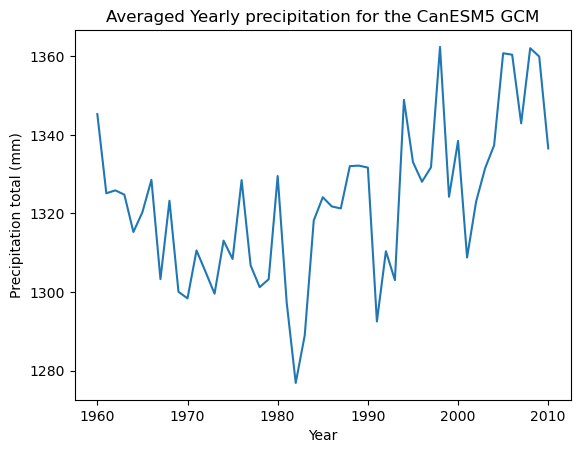

In [3]:
bc_dset = xr.open_dataset('can_bc_dset.nc')
mean_precip = bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip.mean('member_id').pr.plot()
can_avg = mean_precip.mean('member_id')
plt.title("Averaged Yearly precipitation for the CanESM5 GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Precipitation total (mm)')

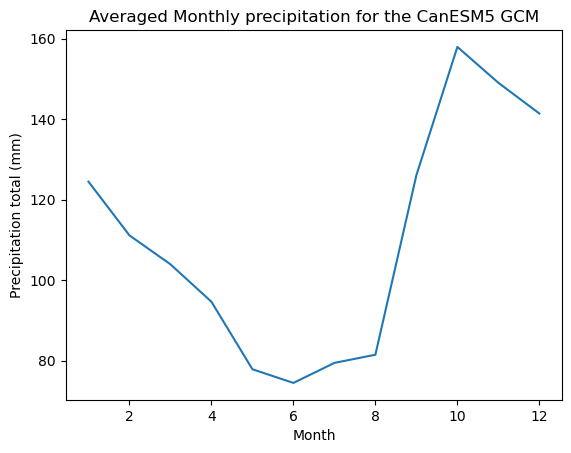

In [4]:
mean_precip_monthly = bc_dset.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4
plt.figure()
mean_precip_monthly.mean('member_id').pr.plot()
mt_can = mean_precip_monthly.mean('member_id')
plt.title("Averaged Monthly precipitation for the CanESM5 GCM")
plt.xlabel('Month')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Precipitation total (mm)')

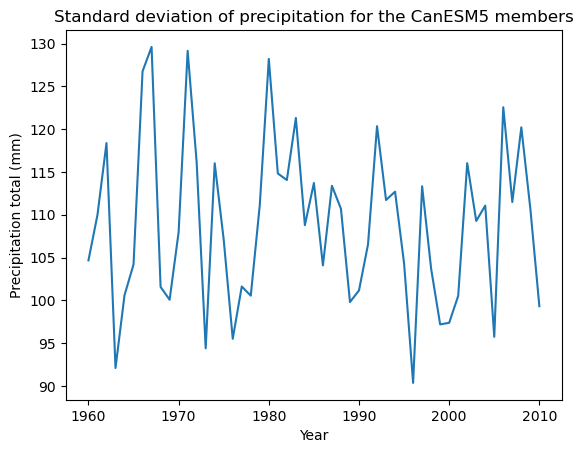

In [5]:
var_precip = bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
var_precip.std('member_id').pr.plot()
plt.title("Standard deviation of precipitation for the CanESM5 members")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Number')

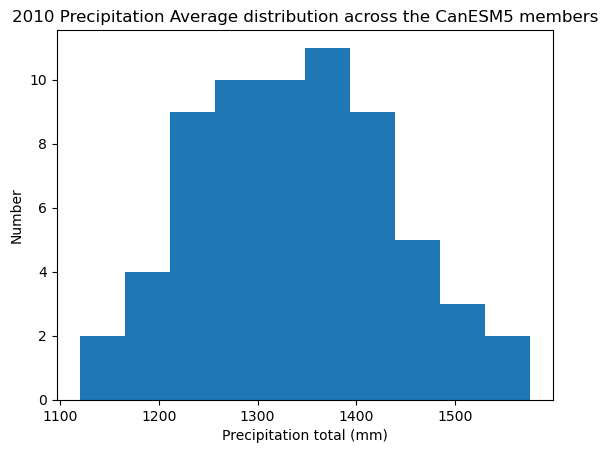

In [6]:
hist_data = bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
hist_data = hist_data.sel(year=2010)
hist_data.pr.plot.hist()
plt.title("2010 Precipitation Average distribution across the CanESM5 members")
plt.xlabel('Precipitation total (mm)')
plt.ylabel('Number')

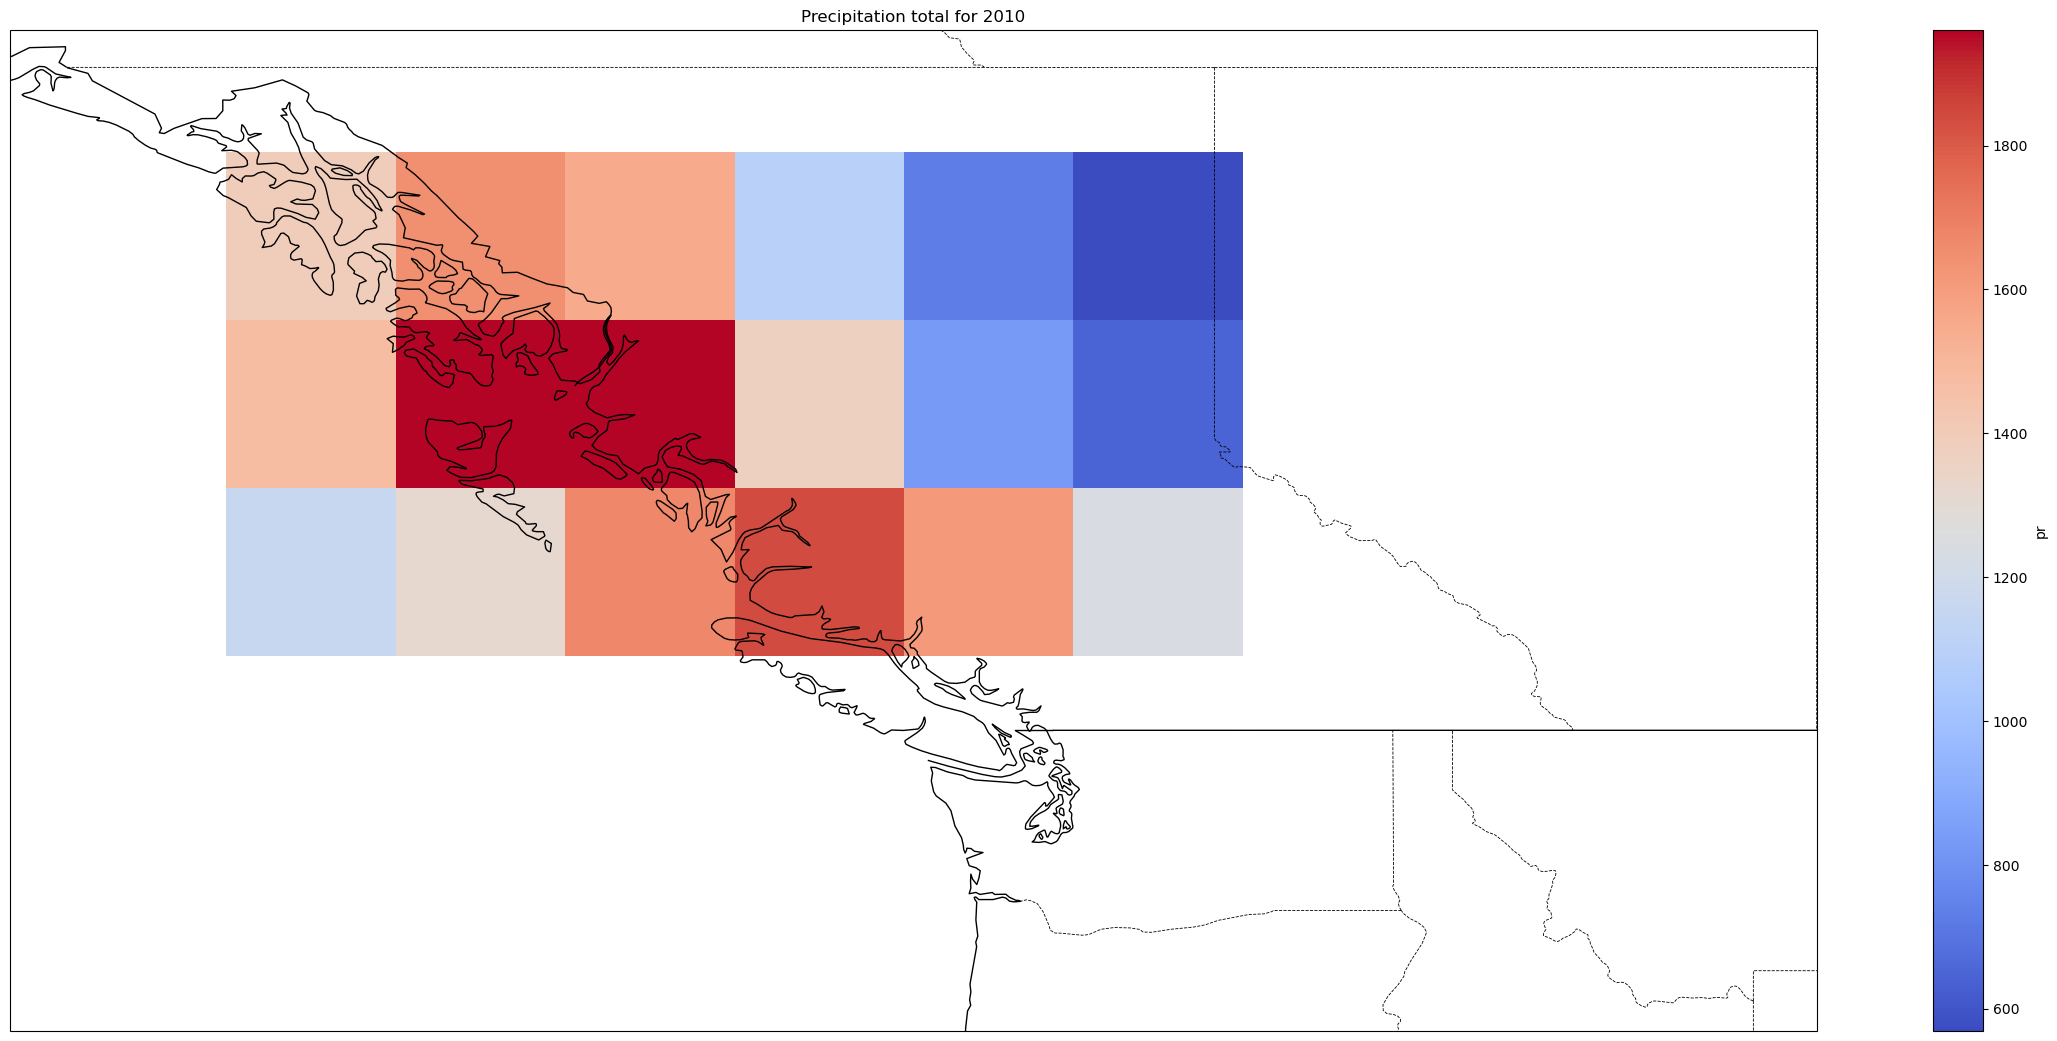

In [7]:
## Try plotting on a map for 2010

data2010 = bc_dset.sel(time='2010')
precip_data2010 = data2010.groupby('time.year').mean('time')*86400*365
precip_data2010 = precip_data2010.mean('member_id')

fig = plt.figure(1, figsize=[30,13])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-140, -110, 44, 60])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)



precip_data2010.pr.plot(ax=ax,cmap='coolwarm')
ax.title.set_text("Precipitation total for 2010")

# HadGEM3

In [8]:
hadGEM = False
if hadGEM:
    had_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "HadGEM3-GC31-MM", experiment_id = 'historical')
    dset_dict = had_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    had_dset = dset_dict['CMIP.MOHC.HadGEM3-GC31-MM.historical.Amon.gn']
    had_bc_dset = had_dset.sel(lon = slice(225.4, 239.6), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))
    had_bc_dset.load().to_netcdf('had_bc_dset.nc')
    print('done')

Text(0, 0.5, 'Precipitation total (mm)')

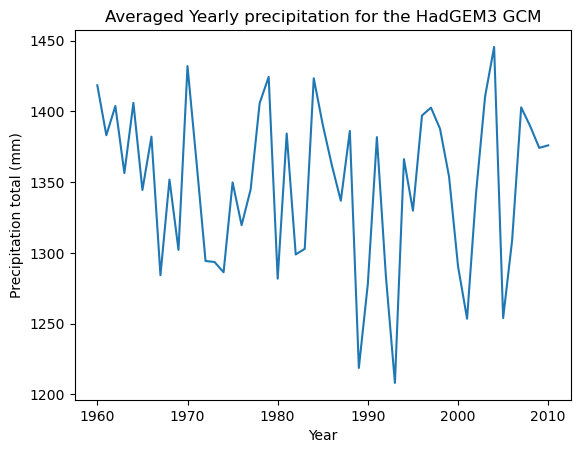

In [9]:
had_bc_dset = xr.open_dataset('had_regrid.nc')
mean_precip_had = had_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip_had.mean('member_id').pr.plot()
plt.title("Averaged Yearly precipitation for the HadGEM3 GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')


Text(0, 0.5, 'Precipitation total (mm)')

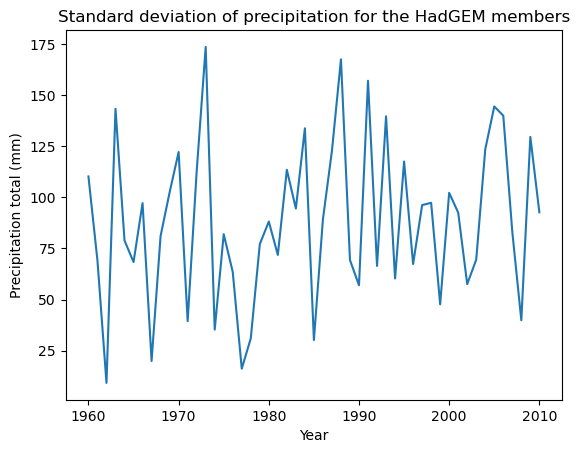

In [10]:
had_std_precip = had_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
had_std_precip.std('member_id').pr.plot()
plt.title("Standard deviation of precipitation for the HadGEM members")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Precipitation total (mm)')

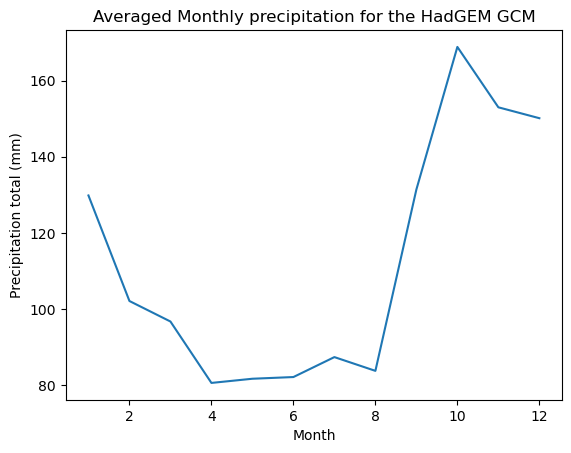

In [11]:
mean_precip_monthly = had_bc_dset.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4
plt.figure()
mean_precip_monthly.mean('member_id').pr.plot()
mt_had = mean_precip_monthly.mean('member_id')
plt.title("Averaged Monthly precipitation for the HadGEM GCM")
plt.xlabel('Month')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Number')

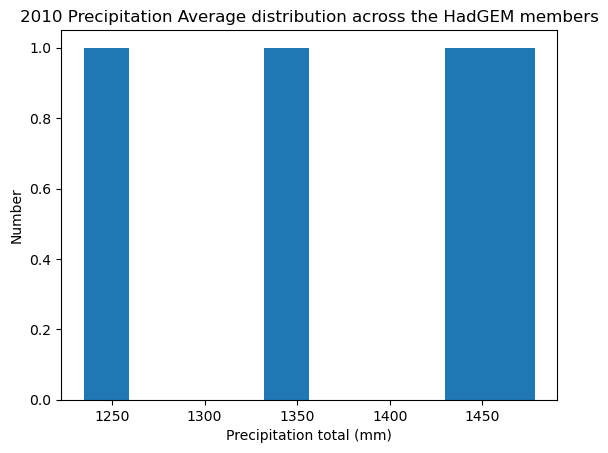

In [12]:
had_hist_data = had_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
had_hist_data = had_hist_data.sel(year=2010)
had_hist_data.pr.plot.hist()
plt.title("2010 Precipitation Average distribution across the HadGEM members")
plt.xlabel('Precipitation total (mm)')
plt.ylabel('Number')

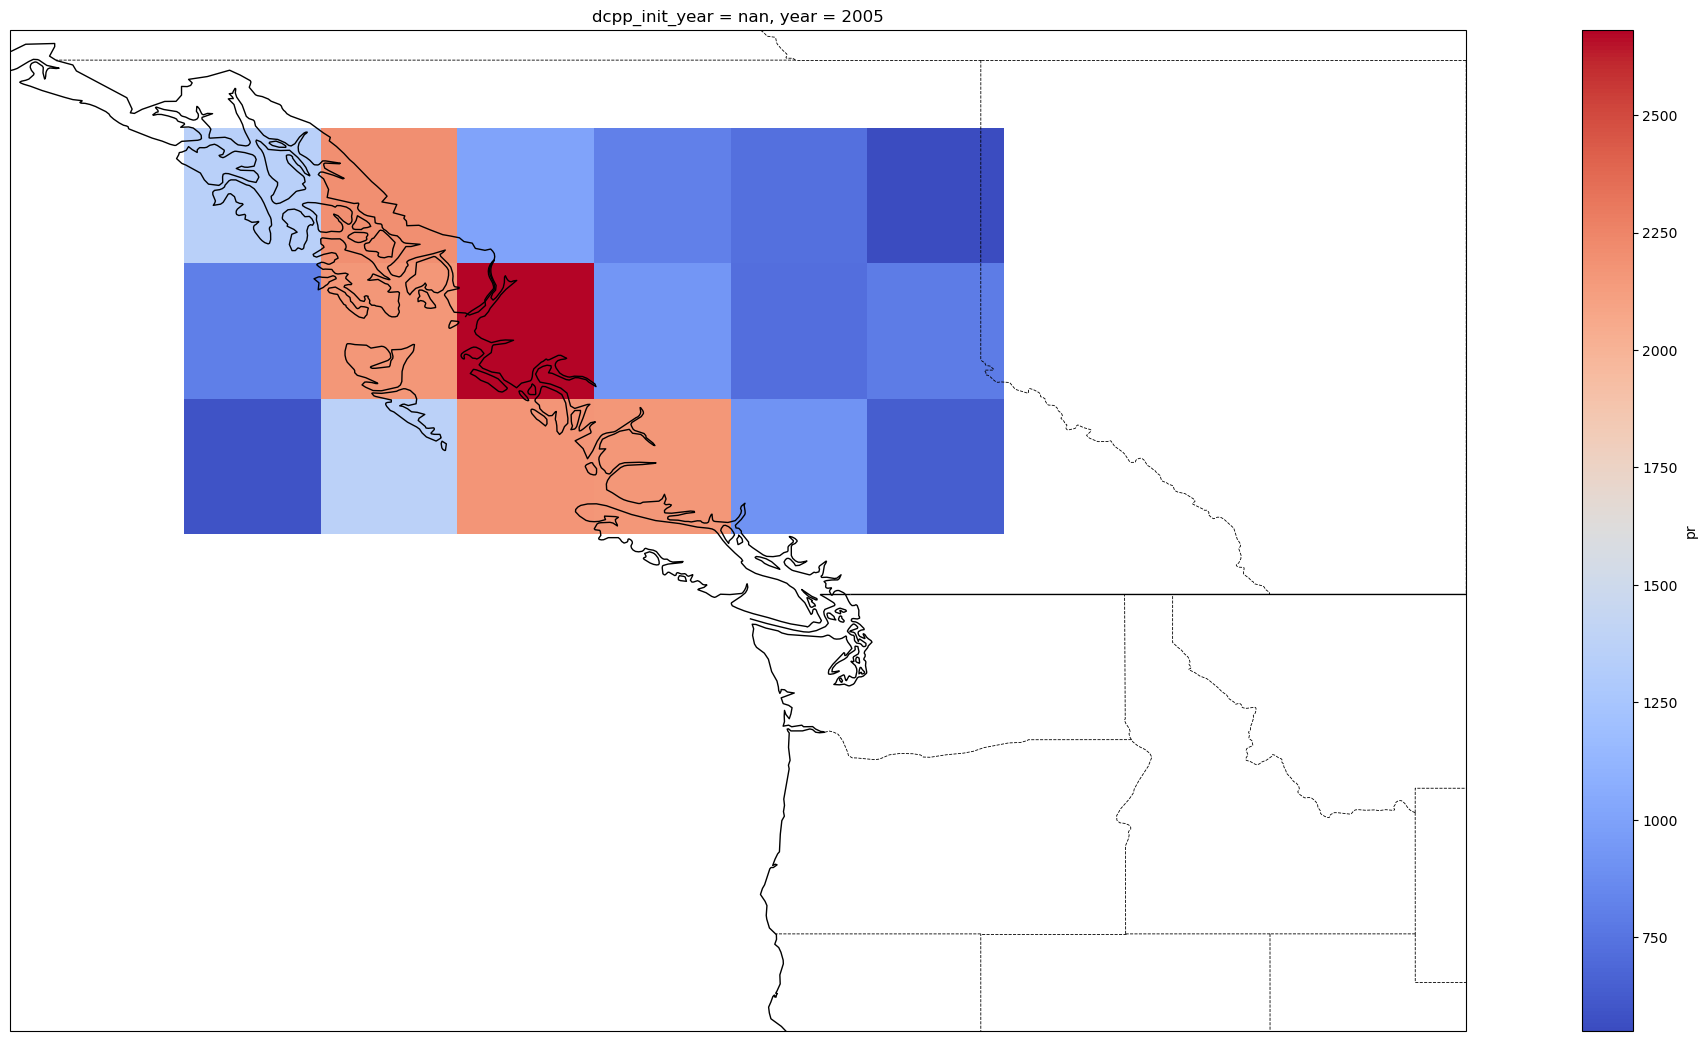

In [13]:
had_data2010 = had_bc_dset.sel(time='2005')
had_precip_data2010 = had_data2010.groupby('time.year').mean('time')*86400*365
had_precip_data2010 = had_precip_data2010.mean('member_id')

fig = plt.figure(1, figsize=[30,13])

ax2 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax2.coastlines()
ax2.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax2.set_extent([-140, -110, 40, 60])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax2.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)



had_precip_data2010.pr.plot(ax=ax2,cmap='coolwarm')
ax.title.set_text("Precipitation total for 2010")

# GISS

In [14]:
GISS = False
if GISS:
    gis_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "GISS-E2-1-H", experiment_id = 'historical')
    dset_dict = gis_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    gis_dset = dset_dict['CMIP.NASA-GISS.GISS-E2-1-H.historical.Amon.gn']
    gis_bc_dset = gis_dset.sel(lon = slice(226.25, 238.75), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))
    gis_bc_dset.load().to_netcdf('gis_bc_dset.nc')

Text(0, 0.5, 'Precipitation total (mm)')

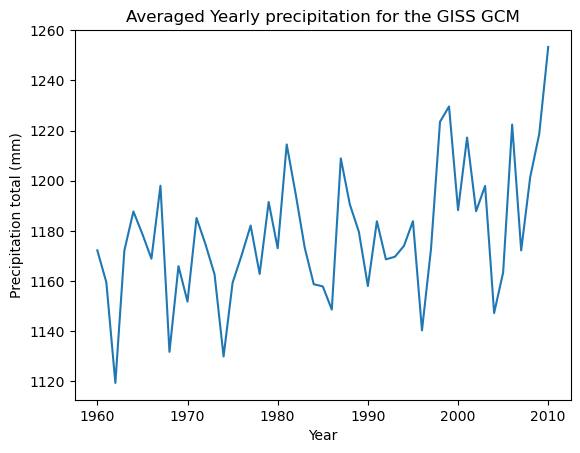

In [15]:
gis_bc_dset = xr.open_dataset('gis_regrid.nc')
mean_precip_gis = gis_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip_gis.mean('member_id').pr.plot()
plt.title("Averaged Yearly precipitation for the GISS GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Precipitation total (mm)')

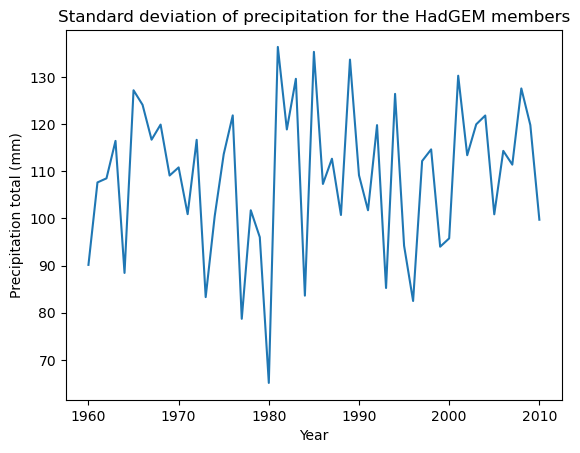

In [16]:
gis_std_precip = gis_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
gis_std_precip.std('member_id').pr.plot()
plt.title("Standard deviation of precipitation for the HadGEM members")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Precipitation total (mm)')

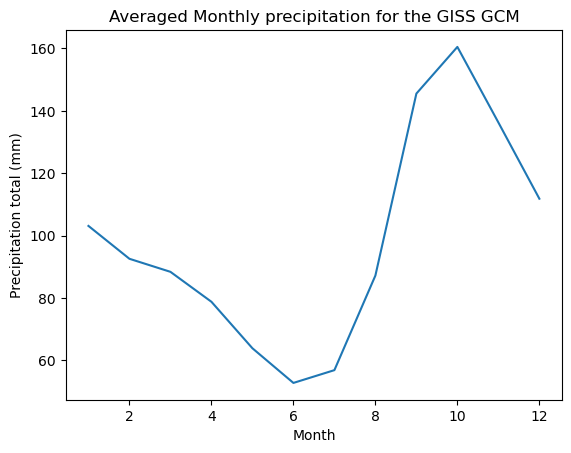

In [17]:
mean_precip_monthly = gis_bc_dset.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4
plt.figure()
mean_precip_monthly.mean('member_id').pr.plot()
mt_gis = mean_precip_monthly.mean('member_id')
plt.title("Averaged Monthly precipitation for the GISS GCM")
plt.xlabel('Month')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Number')

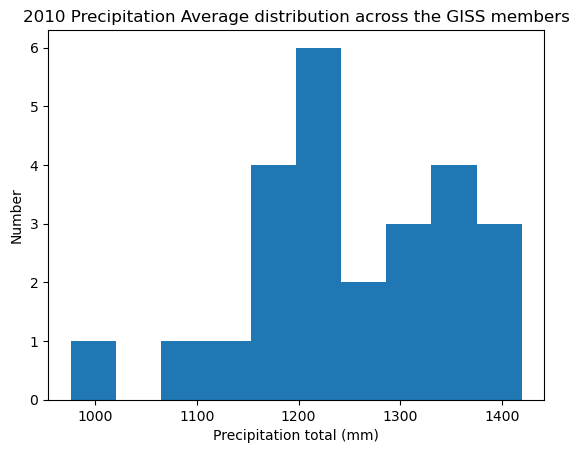

In [18]:
gis_hist_data = gis_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
gis_hist_data = gis_hist_data.sel(year=2010)
gis_hist_data.pr.plot.hist()
plt.title("2010 Precipitation Average distribution across the GISS members")
plt.xlabel('Precipitation total (mm)')
plt.ylabel('Number')

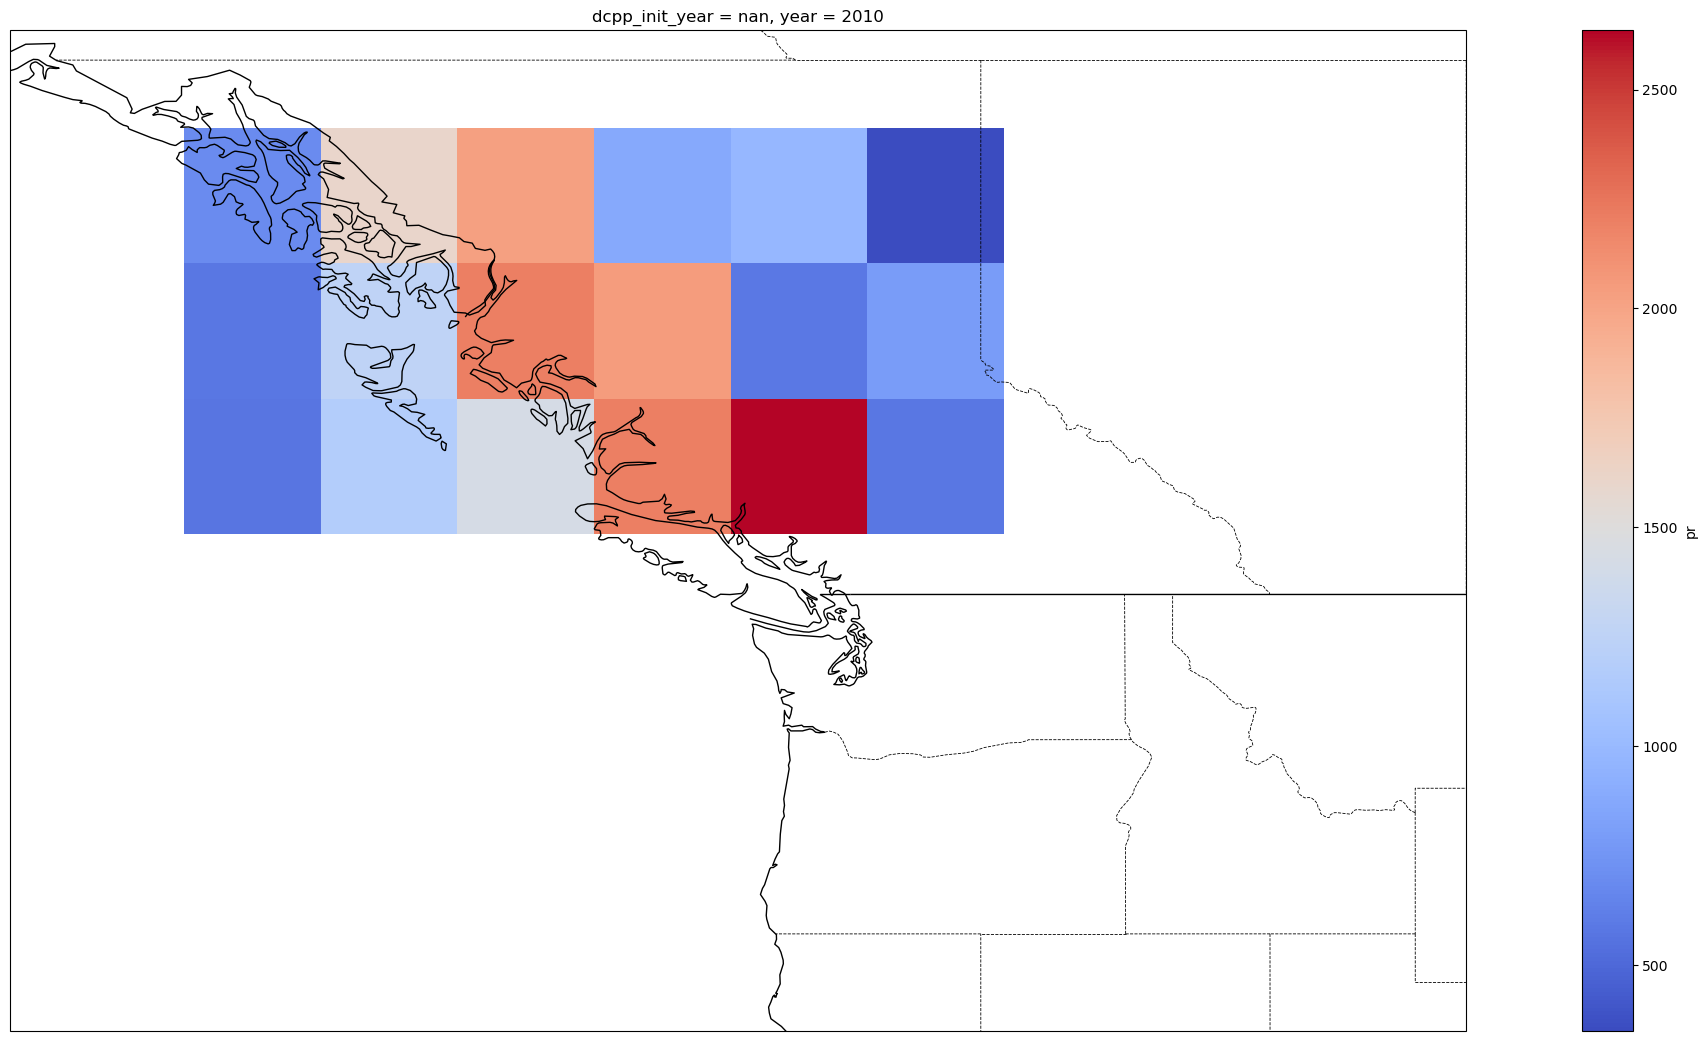

In [19]:
gis_data1990 = gis_bc_dset.sel(time='2010')
gis_precip_data1990 = gis_data1990.groupby('time.year').mean('time')*86400*365
gis_precip_data1990 = gis_precip_data1990.mean('member_id')

fig = plt.figure(1, figsize=[30,13])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-140, -110, 40, 60])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)



gis_precip_data1990.pr.plot(ax=ax,cmap='coolwarm')

### CRU Historical Data

In [20]:
filename = "cru_ts4.02.2001.2010.pre.dat.nc"
cru_xr = xr.open_dataset(filename)

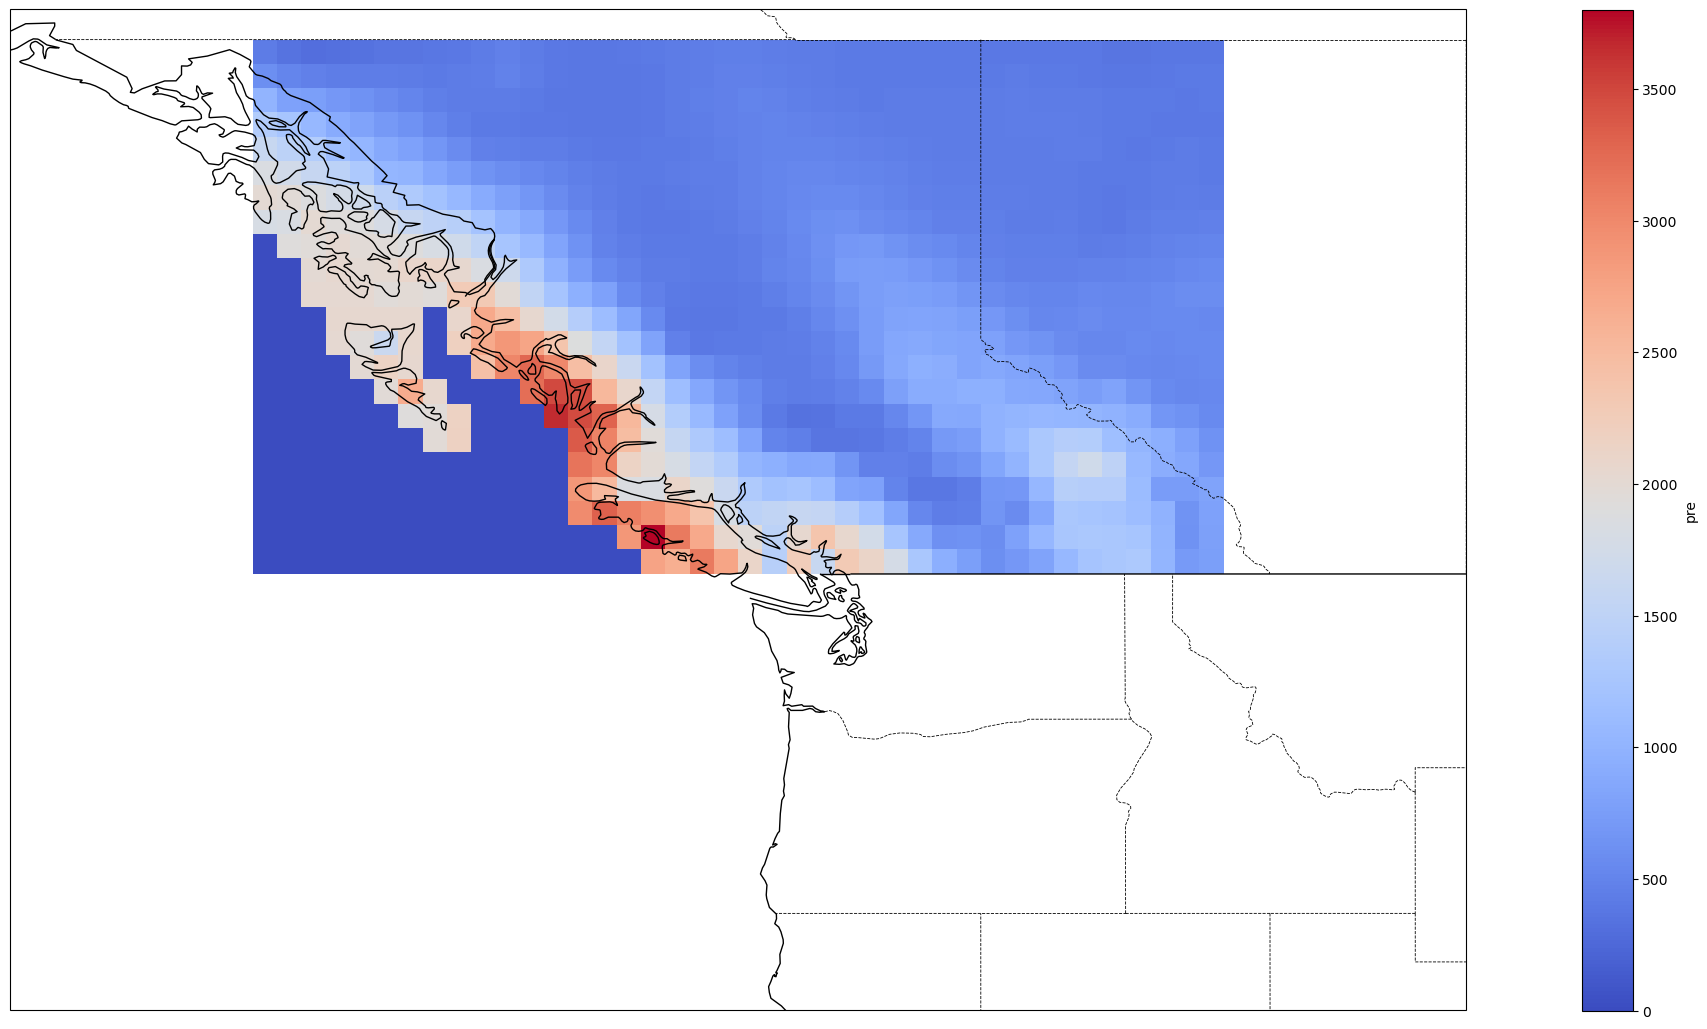

In [21]:
cru_2010 = cru_xr.pre.sel(time='2010', lon = slice(-134.75, -115.25), lat = slice(49.25, 59.75))
cru_plot = cru_2010.sum('time')

fig = plt.figure(1, figsize=[30,13])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-140, -110, 40, 60])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)



cru_plot.plot(ax=ax,cmap='coolwarm')

Text(0, 0.5, 'Precipitation total (mm)')

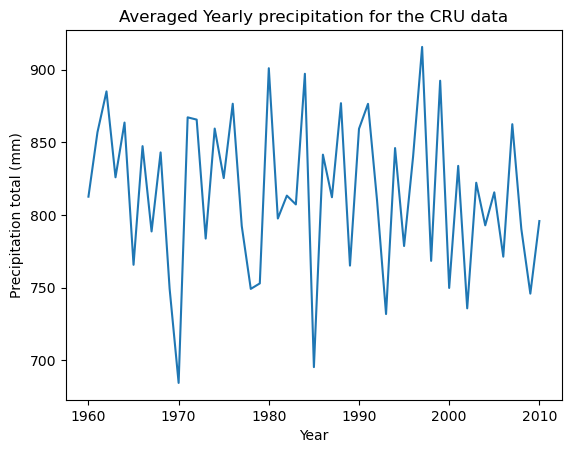

In [22]:
if False:
    filename= "cru_ts4.02.1901.2017.pre.dat.nc"
    cru_xr_hist = xr.open_dataset(filename)
    cru_9010 = cru_xr_hist.sel(time = slice('1960', '2010'), lon = slice(-134.75, -115.25), lat = slice(49.25, 59.75))
    cru_9010.load().to_netcdf('cru_6010.nc')

cru_6010 = xr.open_dataset('cru_6010.nc')
cru_6010 = cru_6010.groupby('time.year').sum('time').mean(['lon', 'lat'])
plt.figure()
cru_6010.pre.plot()
plt.title("Averaged Yearly precipitation for the CRU data")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')
# test = cru_6010.sel(time='2010').groupby('time.year').mean('time')
# test.dropna(dim='lat', how='any')

### Creating plots with all 3 models

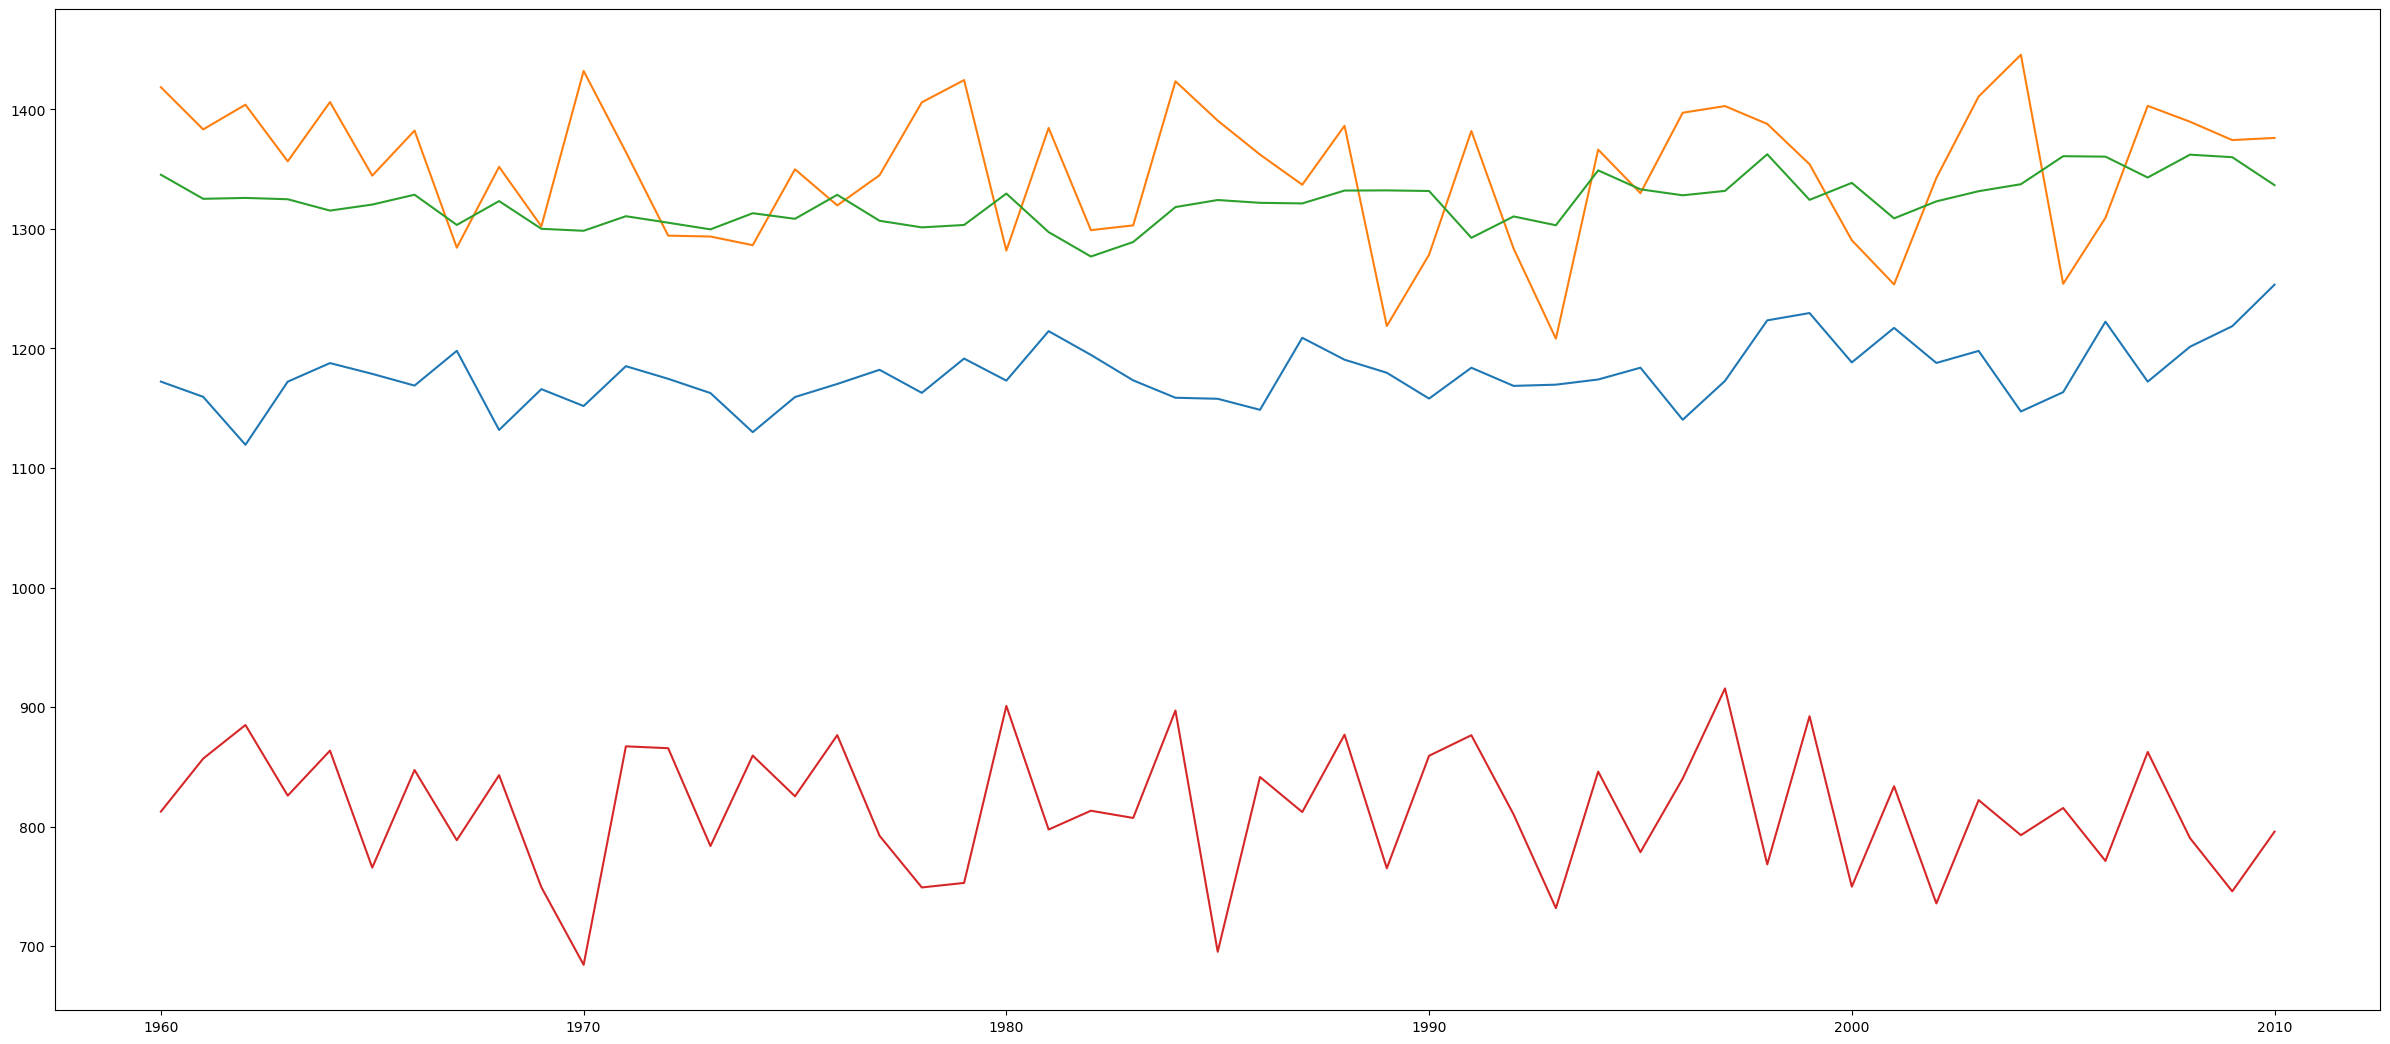

In [23]:
time = mean_precip_gis.year
fig, axs = plt.subplots(1, 1, figsize=(30, 13))
axs.plot(time,mean_precip_gis.mean('member_id').pr)
axs.plot(time, mean_precip_had.mean('member_id').pr)
axs.plot(time, mean_precip.mean('member_id').pr)
axs.plot(time, cru_6010.pre)

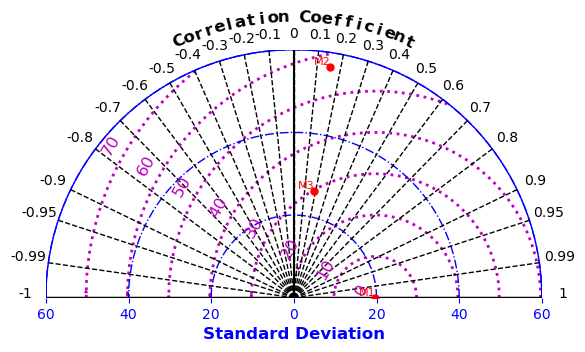

In [24]:
import skill_metrics as sm
import numpy as np

ref = mean_precip.mean('member_id').pr.to_numpy().flatten()
can = ref
had = mean_precip_had.mean('member_id').pr.to_numpy().flatten()
gis = mean_precip_gis.mean('member_id').pr.to_numpy().flatten()

data = {'ref': ref, 'can': can, 'had': had, 'gis':gis}

taylor_stats1 = sm.taylor_statistics(data['can'], data['ref'], 'data')
taylor_stats2 = sm.taylor_statistics(data['had'], data['ref'], 'data')
taylor_stats3 = sm.taylor_statistics(data['gis'], data['ref'], 'data')

sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                 taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                  taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                  taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])

# Specify labels for points in a cell array (M1 for model prediction 1,
# etc.). Note that a label needs to be specified for the reference even
# though it is not used.
label = ['Non-Dimensional Observation', 'M1', 'M2', 'M3']

'''
Produce the Taylor diagram

Display the data points for correlations that vary from -1 to 1 (2
panels). Label the points and change the axis options for SDEV, CRMSD,
and CCOEF. Increase the upper limit for the SDEV axis and rotate the
CRMSD contour labels (counter-clockwise from x-axis). Exchange color and
line style choices for SDEV, CRMSD, and CCOEFF variables to show effect.
Increase the line width of all lines.

For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
sm.taylor_diagram(sdev,crmsd,ccoef,
                  numberPanels = 2,
                  markerLabel = label, markerLabelColor = 'r',
                  tickRMS = range(0,90,10), tickRMSangle = 150.0,
                  colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                  titleRMS = 'off',
                  tickSTD = range(0, 80, 20), axismax = 60.0,
                  colSTD = 'b', styleSTD = '-.', widthSTD = 1.0,
                  colCOR = 'k', styleCOR = '--', widthCOR = 1.0)

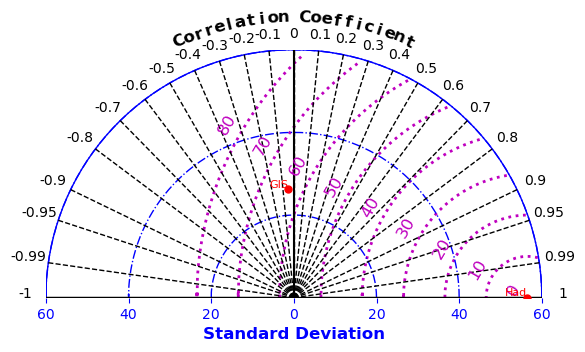

In [25]:
ref = mean_precip_had.mean('member_id').pr.to_numpy().flatten()
had = mean_precip_had.mean('member_id').pr.to_numpy().flatten()
gis = mean_precip_gis.mean('member_id').pr.to_numpy().flatten()

data = {'ref': ref, 'can': can, 'had': had, 'gis':gis}

taylor_stats1 = sm.taylor_statistics(data['had'], data['ref'], 'data')
taylor_stats2 = sm.taylor_statistics(data['gis'], data['ref'], 'data')


sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                 taylor_stats2['sdev'][1]])
crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                  taylor_stats2['crmsd'][1]])
ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                  taylor_stats2['ccoef'][1]])

# Specify labels for points in a cell array (M1 for model prediction 1,
# etc.). Note that a label needs to be specified for the reference even
# though it is not used.
label = ['Reference', 'Had', 'GIS']

'''
Produce the Taylor diagram

Display the data points for correlations that vary from -1 to 1 (2
panels). Label the points and change the axis options for SDEV, CRMSD,
and CCOEF. Increase the upper limit for the SDEV axis and rotate the
CRMSD contour labels (counter-clockwise from x-axis). Exchange color and
line style choices for SDEV, CRMSD, and CCOEFF variables to show effect.
Increase the line width of all lines.

For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
sm.taylor_diagram(sdev,crmsd,ccoef,
                  numberPanels = 2,
                  markerLabel = label, markerLabelColor = 'r',
                  tickRMS = range(0,90,10), tickRMSangle = 150.0,
                  colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                  titleRMS = 'off',
                  tickSTD = range(0, 80, 20), axismax = 60.0,
                  colSTD = 'b', styleSTD = '-.', widthSTD = 1.0,
                  colCOR = 'k', styleCOR = '--', widthCOR = 1.0)

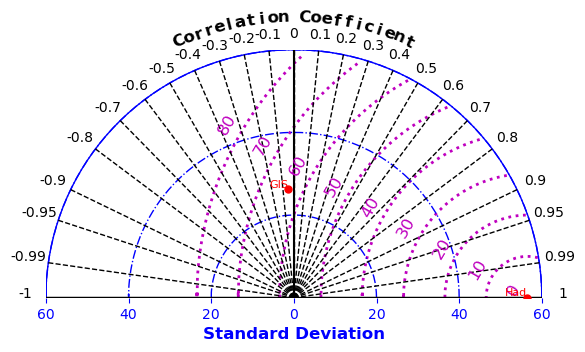

In [26]:
ref = mean_precip_had.mean('member_id').pr.to_numpy().flatten()
had = mean_precip_had.mean('member_id').pr.to_numpy().flatten()
gis = mean_precip_gis.mean('member_id').pr.to_numpy().flatten()

data = {'ref': ref, 'can': can, 'had': had, 'gis':gis}

taylor_stats1 = sm.taylor_statistics(data['had'], data['ref'], 'data')
taylor_stats2 = sm.taylor_statistics(data['gis'], data['ref'], 'data')


sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                 taylor_stats2['sdev'][1]])
crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                  taylor_stats2['crmsd'][1]])
ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                  taylor_stats2['ccoef'][1]])

# Specify labels for points in a cell array (M1 for model prediction 1,
# etc.). Note that a label needs to be specified for the reference even
# though it is not used.
label = ['Reference', 'Had', 'GIS']

'''
Produce the Taylor diagram

Display the data points for correlations that vary from -1 to 1 (2
panels). Label the points and change the axis options for SDEV, CRMSD,
and CCOEF. Increase the upper limit for the SDEV axis and rotate the
CRMSD contour labels (counter-clockwise from x-axis). Exchange color and
line style choices for SDEV, CRMSD, and CCOEFF variables to show effect.
Increase the line width of all lines.

For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
sm.taylor_diagram(sdev,crmsd,ccoef,
                  numberPanels = 2,
                  markerLabel = label, markerLabelColor = 'r',
                  tickRMS = range(0,90,10), tickRMSangle = 150.0,
                  colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                  titleRMS = 'off',
                  tickSTD = range(0, 80, 20), axismax = 60.0,
                  colSTD = 'b', styleSTD = '-.', widthSTD = 1.0,
                  colCOR = 'k', styleCOR = '--', widthCOR = 1.0)

## Regridded swath of BC

Here I am going to take a subset of the grids where CRU data is available and compare from there instead of having to deal with that nans and see if that makes a difference.

In [27]:
can = xr.open_dataset('can_bc_dset.nc')
had = xr.open_dataset('had_regrid.nc')
gis = xr.open_dataset('gis_regrid.nc')
cru = xr.open_dataset('cru_regrid.nc')

In [28]:
can

<xarray.Dataset> Size: 3MB
Dimensions:         (lat: 3, bnds: 2, lon: 6, member_id: 65, dcpp_init_year: 1,
                     time: 612)
Coordinates:
  * lat             (lat) float64 24B 51.63 54.42 57.21
    lat_bnds        (lat, bnds) float64 48B ...
  * lon             (lon) float64 48B 225.0 227.8 230.6 233.4 236.2 239.1
    lon_bnds        (lon, bnds) float64 96B ...
  * time            (time) object 5kB 1960-01-16 12:00:00 ... 2010-12-16 12:0...
    time_bnds       (time, bnds) object 10kB ...
  * member_id       (member_id) <U9 2kB 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: bnds
Data variables:
    pr              (member_id, dcpp_init_year, time, lat, lon) float32 3MB ...
Attributes: (12/47)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        1850:01:01:00
    activity_id:                      CMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             0.0
    contact:                          ec.cccma.info-info.ccmac.ec@canada.ca
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     pr
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.historical.Amon.gn

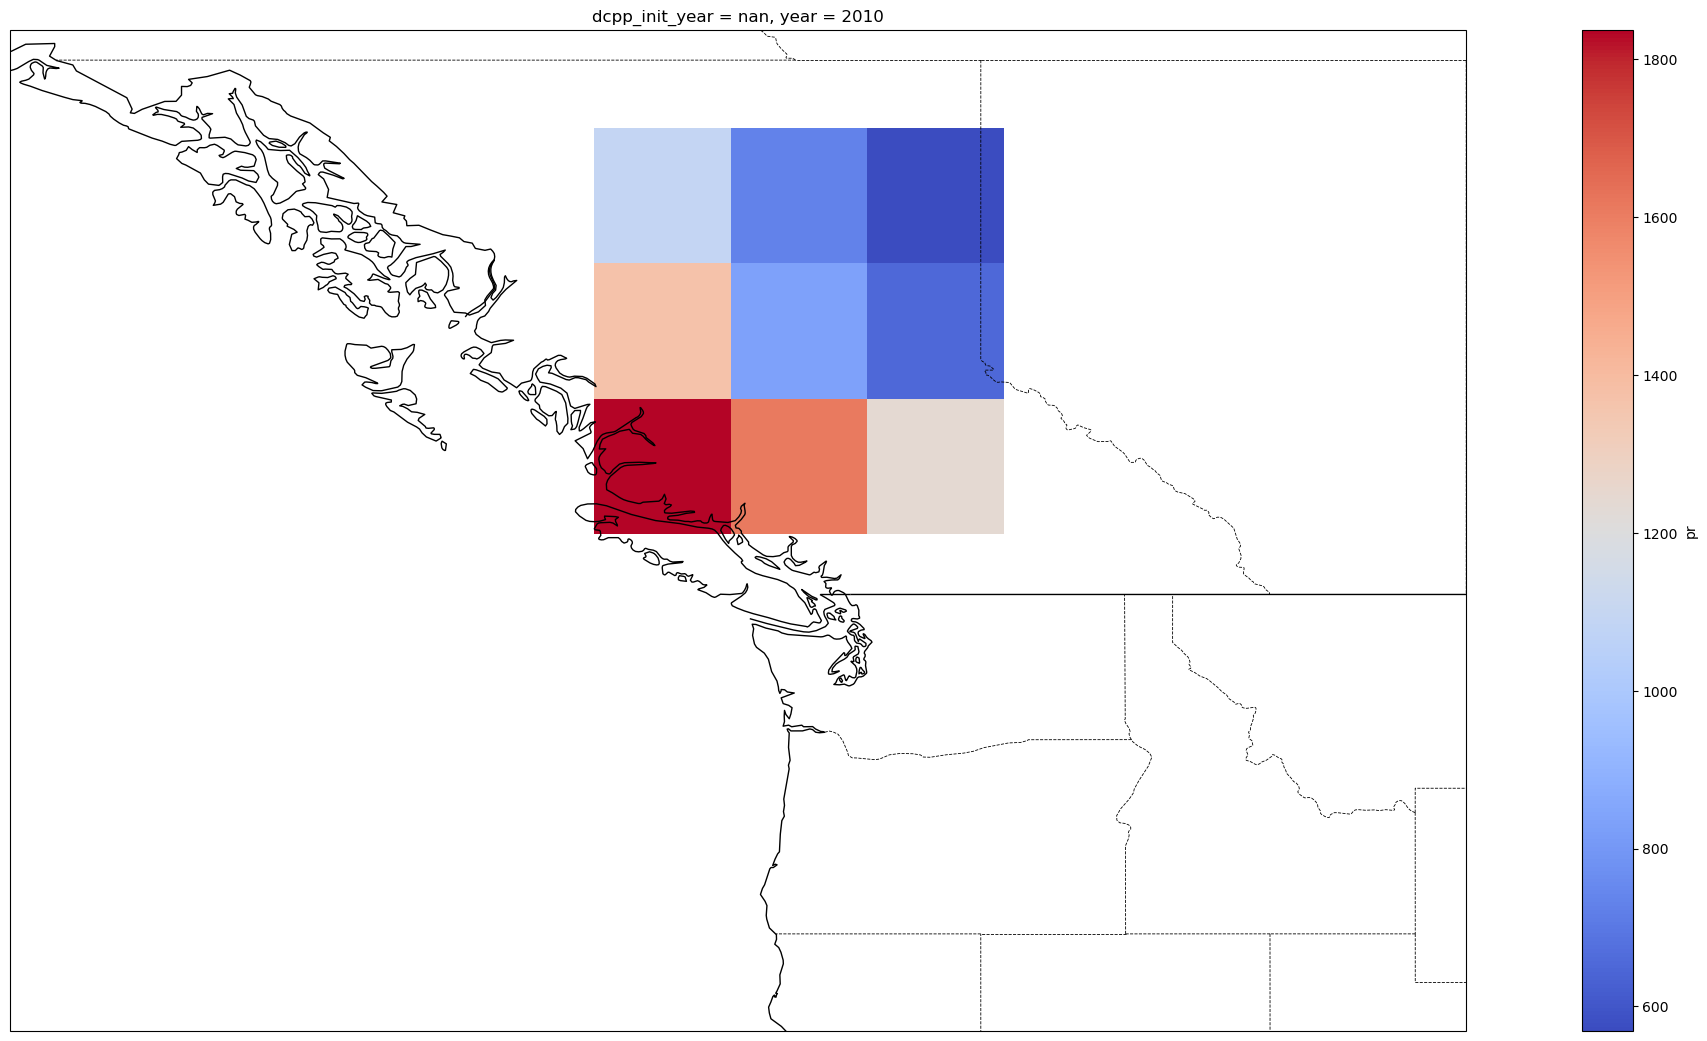

In [29]:
can_data = can.sel(lon=slice(233.4375, 239.0625), time='2010')
can_data = can_data.groupby('time.year').mean('time')*86400*365
can_data = can_data.mean('member_id')


fig = plt.figure(1, figsize=[30,13])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-140, -110, 40, 60])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)



can_data.pr.plot(ax=ax,cmap='coolwarm')

In [30]:
# slice the datasets
can_sliced = can.sel(lon=slice(233.4375, 239.0625))
had_sliced = had.sel(lon=slice(233.4375, 239.0625))
gis_sliced = gis.sel(lon=slice(233.4375, 239.0625))
cru_sliced = cru.sel(lon=slice(233.4375, 239.0625))

# average the precip
can_sliced = can_sliced.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
had_sliced = had_sliced.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
gis_sliced = gis_sliced.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
cru_sliced = cru_sliced.groupby('time.year').sum('time').mean(['lon', 'lat'])

# average across members
can_sliced = can_sliced.mean('member_id')
had_sliced = had_sliced.mean('member_id')
gis_sliced = gis_sliced.mean('member_id')

#### Create a new plot with all 3 models and cru data

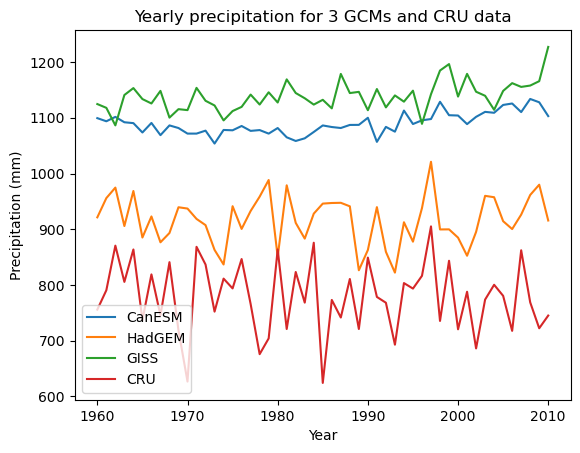

In [31]:
time = mean_precip_gis.year
fig, axs = plt.subplots(1, 1)
axs.plot(time,can_sliced.pr, label='CanESM')
axs.plot(time, had_sliced.pr, label='HadGEM')
axs.plot(time, gis_sliced.pr, label='GISS')
axs.plot(time, cru_sliced.pre, label='CRU')
axs.set_xlabel('Year')
axs.set_ylabel('Precipitation (mm)')
axs.set_title('Yearly precipitation for 3 GCMs and CRU data')
axs.legend()

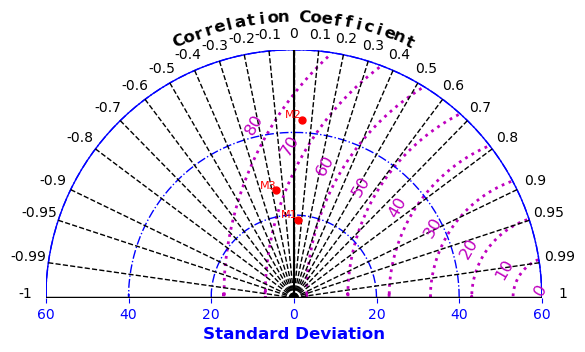

In [32]:
ref = cru_sliced.pre.to_numpy().flatten()
can = can_sliced.pr.to_numpy().flatten()
had = had_sliced.pr.to_numpy().flatten()
gis = gis_sliced.pr.to_numpy().flatten()

data = {'ref': ref, 'can': can, 'had': had, 'gis':gis}

taylor_stats1 = sm.taylor_statistics(data['can'], data['ref'], 'data')
taylor_stats2 = sm.taylor_statistics(data['had'], data['ref'], 'data')
taylor_stats3 = sm.taylor_statistics(data['gis'], data['ref'], 'data')

sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                 taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                  taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                  taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])

# Specify labels for points in a cell array (M1 for model prediction 1,
# etc.). Note that a label needs to be specified for the reference even
# though it is not used.
label = ['Non-Dimensional Observation', 'M1', 'M2', 'M3']

'''
Produce the Taylor diagram

Display the data points for correlations that vary from -1 to 1 (2
panels). Label the points and change the axis options for SDEV, CRMSD,
and CCOEF. Increase the upper limit for the SDEV axis and rotate the
CRMSD contour labels (counter-clockwise from x-axis). Exchange color and
line style choices for SDEV, CRMSD, and CCOEFF variables to show effect.
Increase the line width of all lines.

For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
sm.taylor_diagram(sdev,crmsd,ccoef,
                  numberPanels = 2,
                  markerLabel = label, markerLabelColor = 'r',
                  tickRMS = range(0,90,10), tickRMSangle = 150.0,
                  colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                  titleRMS = 'off',
                  tickSTD = range(0, 80, 20), axismax = 60.0,
                  colSTD = 'b', styleSTD = '-.', widthSTD = 1.0,
                  colCOR = 'k', styleCOR = '--', widthCOR = 1.0)

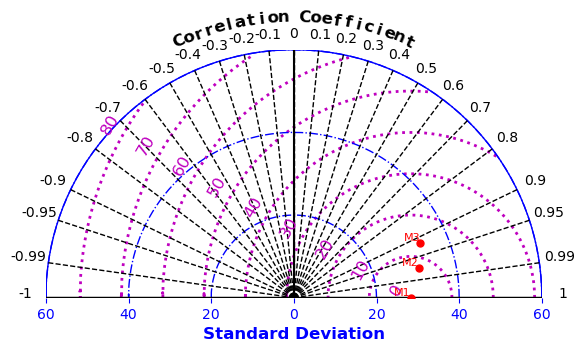

In [33]:
### Monthly correlation

ref = mt_can.pr.to_numpy().flatten()
can = ref
had = mt_had.pr.to_numpy().flatten()
gis = mt_gis.pr.to_numpy().flatten()

data = {'ref': ref, 'can': can, 'had': had, 'gis':gis}

taylor_stats1 = sm.taylor_statistics(data['can'], data['ref'], 'data')
taylor_stats2 = sm.taylor_statistics(data['had'], data['ref'], 'data')
taylor_stats3 = sm.taylor_statistics(data['gis'], data['ref'], 'data')

sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                 taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                  taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                  taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])

# Specify labels for points in a cell array (M1 for model prediction 1,
# etc.). Note that a label needs to be specified for the reference even
# though it is not used.
label = ['Non-Dimensional Observation', 'M1', 'M2', 'M3']

'''
Produce the Taylor diagram

Display the data points for correlations that vary from -1 to 1 (2
panels). Label the points and change the axis options for SDEV, CRMSD,
and CCOEF. Increase the upper limit for the SDEV axis and rotate the
CRMSD contour labels (counter-clockwise from x-axis). Exchange color and
line style choices for SDEV, CRMSD, and CCOEFF variables to show effect.
Increase the line width of all lines.

For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
sm.taylor_diagram(sdev,crmsd,ccoef,
                  numberPanels = 2,
                  markerLabel = label, markerLabelColor = 'r',
                  tickRMS = range(0,90,10), tickRMSangle = 150.0,
                  colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                  titleRMS = 'off',
                  tickSTD = range(0, 80, 20), axismax = 60.0,
                  colSTD = 'b', styleSTD = '-.', widthSTD = 1.0,
                  colCOR = 'k', styleCOR = '--', widthCOR = 1.0)

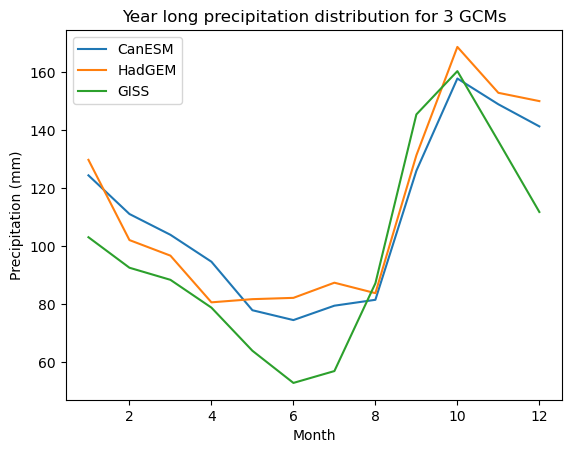

In [34]:
time = mt_can.month
fig, axs = plt.subplots(1, 1)
axs.plot(time,mt_can.pr, label='CanESM')
axs.plot(time, mt_had.pr, label='HadGEM')
axs.plot(time, mt_gis.pr, label='GISS')
axs.set_xlabel('Month')
axs.set_ylabel('Precipitation (mm)')
axs.set_title('Year long precipitation distribution for 3 GCMs')
axs.legend()

In [35]:
mt_can

<xarray.Dataset> Size: 200B
Dimensions:         (dcpp_init_year: 1, month: 12)
Coordinates:
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
  * month           (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    pr              (month, dcpp_init_year) float64 96B 124.5 111.1 ... 141.4

## Studying anomalies

In [36]:
## Start with the Canadian model
can_precip = bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
precip_anom = can_precip - can_avg

Text(0, 0.5, 'Precipitation total (mm)')

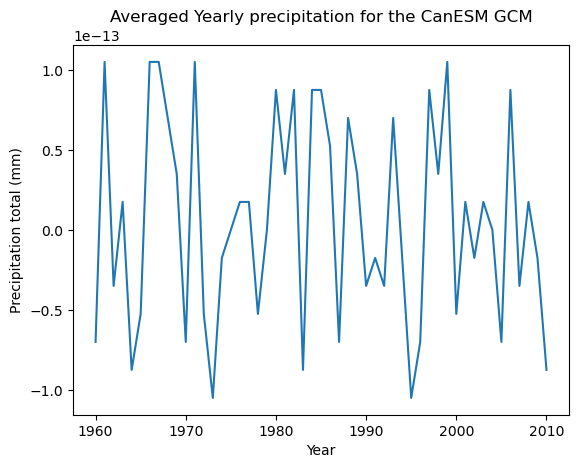

In [37]:
can_data = precip_anom.mean('member_id')
plt.figure()
can_data.pr.plot()
plt.title("Averaged Yearly precipitation for the CanESM GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

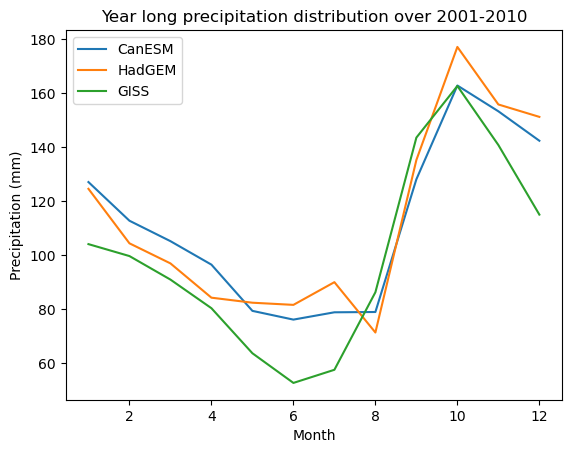

In [38]:
## Here we plot 20 year periods at a time

can_20 = bc_dset.sel(time=slice('2001', '2010'))
had_20 = had_bc_dset.sel(time=slice('2001', '2010'))
gis_20 = gis_bc_dset.sel(time=slice('2001', '2010'))

can_20 = can_20.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4
had_20 = had_20.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4
gis_20 = gis_20.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4

can_20 = can_20.mean('member_id')
had_20 = had_20.mean('member_id')
gis_20 = gis_20.mean('member_id')

time = can_20.month
fig, axs = plt.subplots(1, 1)
axs.plot(time,can_20.pr, label='CanESM')
axs.plot(time, had_20.pr, label='HadGEM')
axs.plot(time, gis_20.pr, label='GISS')
axs.set_xlabel('Month')
axs.set_ylabel('Precipitation (mm)')
axs.set_title('Year long precipitation distribution over 2001-2010')
axs.legend()

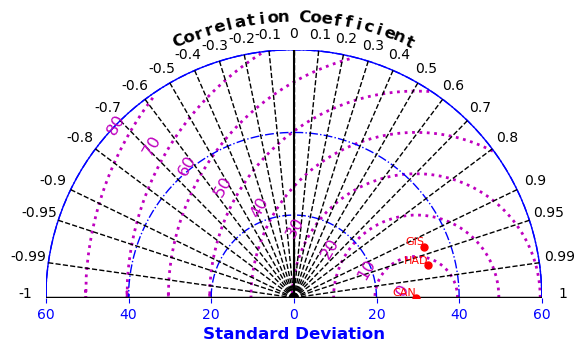

In [39]:
### Monthly correlation

ref = can_20.pr.to_numpy().flatten()
can = ref
had = had_20.pr.to_numpy().flatten()
gis = gis_20.pr.to_numpy().flatten()

data = {'ref': ref, 'can': can, 'had': had, 'gis':gis}

taylor_stats1 = sm.taylor_statistics(data['can'], data['ref'], 'data')
taylor_stats2 = sm.taylor_statistics(data['had'], data['ref'], 'data')
taylor_stats3 = sm.taylor_statistics(data['gis'], data['ref'], 'data')

sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                 taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                  taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                  taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])

# Specify labels for points in a cell array (M1 for model prediction 1,
# etc.). Note that a label needs to be specified for the reference even
# though it is not used.
label = ['Non-Dimensional Observation', 'CAN', 'HAD', 'GIS']

'''
Produce the Taylor diagram

Display the data points for correlations that vary from -1 to 1 (2
panels). Label the points and change the axis options for SDEV, CRMSD,
and CCOEF. Increase the upper limit for the SDEV axis and rotate the
CRMSD contour labels (counter-clockwise from x-axis). Exchange color and
line style choices for SDEV, CRMSD, and CCOEFF variables to show effect.
Increase the line width of all lines.

For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
sm.taylor_diagram(sdev,crmsd,ccoef,
                  numberPanels = 2,
                  markerLabel = label, markerLabelColor = 'r',
                  tickRMS = range(0,90,10), tickRMSangle = 150.0,
                  colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                  titleRMS = 'off',
                  tickSTD = range(0, 80, 20), axismax = 60.0,
                  colSTD = 'b', styleSTD = '-.', widthSTD = 1.0,
                  colCOR = 'k', styleCOR = '--', widthCOR = 1.0)